# Assignment 2 M&M'S Dashboard

In [ ]:
access_token = "1196672077698232325-1Dx8OBkJewY5GFlIbgIWTr39bZ7ZVU"
access_token_secret = "omU4TGnLsljT7nc8EPiBDe0rO39wqU7QpTo402NzeROjM"
consumer_key = "Ryu7de1dinJdJaNQPDvF8KwMV"
consumer_secret = "EMEm5E2gx4iIayMyfCiqrI3qquKU9zGqI6ZPRgzKGHcw27OQon"

import community
import matplotlib.pyplot as plt
import networkx as nx
import os
import sys
import json
import time
import math
from tweepy import Cursor
import tweepy
from tweepy import OAuthHandler
from tweepy import TweepError
import networkx as nx
import pprint 
pp = pprint.PrettyPrinter(indent=3)
from operator import itemgetter
#!pip install -q gwpy


# authentication
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
%%capture

filter1 = 50
filter2 = 100

import sys
import json
from random import sample

if __name__ == '__main__':
    screen_name = "mmschocolate"
    
    master_nodelist = []
    master_edgelist = []
    
    friends_file = 'outputmmschocolate/users2/{}/friends.json'.format(screen_name)
    with open(friends_file) as f2:
       
        friends = []
        for line in f2:
            profile = json.loads(line)
            friends.append(profile['screen_name'])
            
            
    #Filter out junk friends
    tempfriends = []
    for fr in friends:
        fof_file = 'outputmmschocolate/users2/mmschocolate/{}/friends.json'.format(fr)    
        try:
            with open(fof_file) as f2:
                tempfriends.append(fr)
        except:
            print("Missed: ", fr)    
    
    #Add to master edge and node list 
    master_nodelist.append('mmschocolate')
    
    mmschocolate_fof = {}
    
    for fr in tempfriends[:filter1]:
        try:
            fof_file = 'outputmmschocolate/users2/mmschocolate/{}/friends.json'.format(fr)
            
            master_nodelist.append(fr)
            master_edgelist.append(('mmschocolate',fr))
            with open(fof_file) as f2:
                frlist = []
                count = 0 
                for line in f2:
                    if count <= filter2:
                        profile = json.loads(line)
                        frlist.append(profile['screen_name'])
                        count += 1
                    else:
                        continue
                mmschocolate_fof[fr] = frlist
            
        except:
            print("Missed: ", fr)  #Missed friends due to their account being protected

In [ ]:
%%capture

for fr in friends:
    try:
        for fr2 in mmschocolate_fof[fr]:
            if fr2 not in master_nodelist:
                master_nodelist.append(fr2)
    except:
        print("Missed: ", fr)
                
for fr in friends:
    try:
        for fr2 in mmschocolate_fof[fr]:
            master_edgelist.append((fr,fr2))
    except:
        print("Missed: ", fr) #Missed friends are due to their account being protected

In [ ]:
G = nx.Graph()

G.add_nodes_from(master_nodelist)
G.add_edges_from(master_edgelist)

# Number of Nodes, Edges and Network Density

In [ ]:
print('Nodes: ',G.number_of_nodes())
print('Edges: ',G.number_of_edges())
density = nx.density(G)
print("Network density:", density)

Nodes:  1714
Edges:  1796
Network density: 0.001223399074004064


# Centrality

## Degree Centrality

In [ ]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, name ='degree', values = degree_dict)

sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
sorted_degree[:10]

[('JoeGibbsRacing', 105),
 ('Combos', 104),
 ('NASCAR', 104),
 ('KyleBusch', 104),
 ('milkyway', 103),
 ('MarsGlobal', 103),
 ('MyMMscom', 103),
 ('VWOfficial', 103),
 ('mmscolorfulfans', 103),
 ('Teeqo', 102)]

## Declaring Centralities

In [ ]:
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality
closeness_dict = nx.closeness_centrality(G) # Run closeness centrality


# Assign each to an attribute in your network
nx.set_node_attributes(G, name = 'betweenness', values = betweenness_dict)
nx.set_node_attributes(G, name = 'eigenvector', values = eigenvector_dict)
nx.set_node_attributes(G, name = 'closeness', values = closeness_dict)

## Betweenness Centrality

In [ ]:
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 10 nodes by betweenness centrality:")
for b in sorted_betweenness[:10]:
    print(b)

Top 10 nodes by betweenness centrality:
('mmschocolate', 0.7878788466290786)
('Teeqo', 0.11447779760053686)
('meganandliz', 0.11447779760053686)
('RickyPDillon', 0.11447779760053686)
('MCHammer', 0.11447779760053686)
('KyleBusch', 0.11444060691466393)
('HayesGrier', 0.11376555359146674)
('RedNoseDayUSA', 0.1137655535914664)
('VWOfficial', 0.1137326856123404)
('MyMMscom', 0.11286132512149223)


## Eigenvector Centrality

In [ ]:
sorted_eigenvector = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)

print("Top 10 nodes by eigenvector centrality:")
for b in sorted_eigenvector[:10]:
    print(b)

Top 10 nodes by eigenvector centrality:
('KyleBusch', 0.37911903065794544)
('JoeGibbsRacing', 0.3029643489965788)
('NASCAR', 0.24609768477938476)
('mmschocolate', 0.2262550975100604)
('TheKBshow', 0.22443308285620805)
('MarsGlobal', 0.21218266846429107)
('MMsWorldStores', 0.1934236665096307)
('Combos', 0.19065434730964986)
('mmscolorfulfans', 0.14516227901390868)
('MyMMscom', 0.12772761143464842)


## Closeness Centrality

In [ ]:
sorted_closeness = sorted(closeness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 10 nodes by closeness centrality:")
for b in sorted_closeness[:10]:
    print(b)

Top 10 nodes by closeness centrality:
('mmschocolate', 0.5029359953024075)
('KyleBusch', 0.37906616508077007)
('MMsWorldStores', 0.37831272084805656)
('TheKBshow', 0.36315454738181047)
('SNICKERS', 0.36261642675698563)
('MarsGlobal', 0.36047979797979796)
('twix', 0.35979836168872087)
('NASCAR', 0.35979836168872087)
('MyMMscom', 0.3591947997483749)
('Combos', 0.358143424628894)


# Network Graph

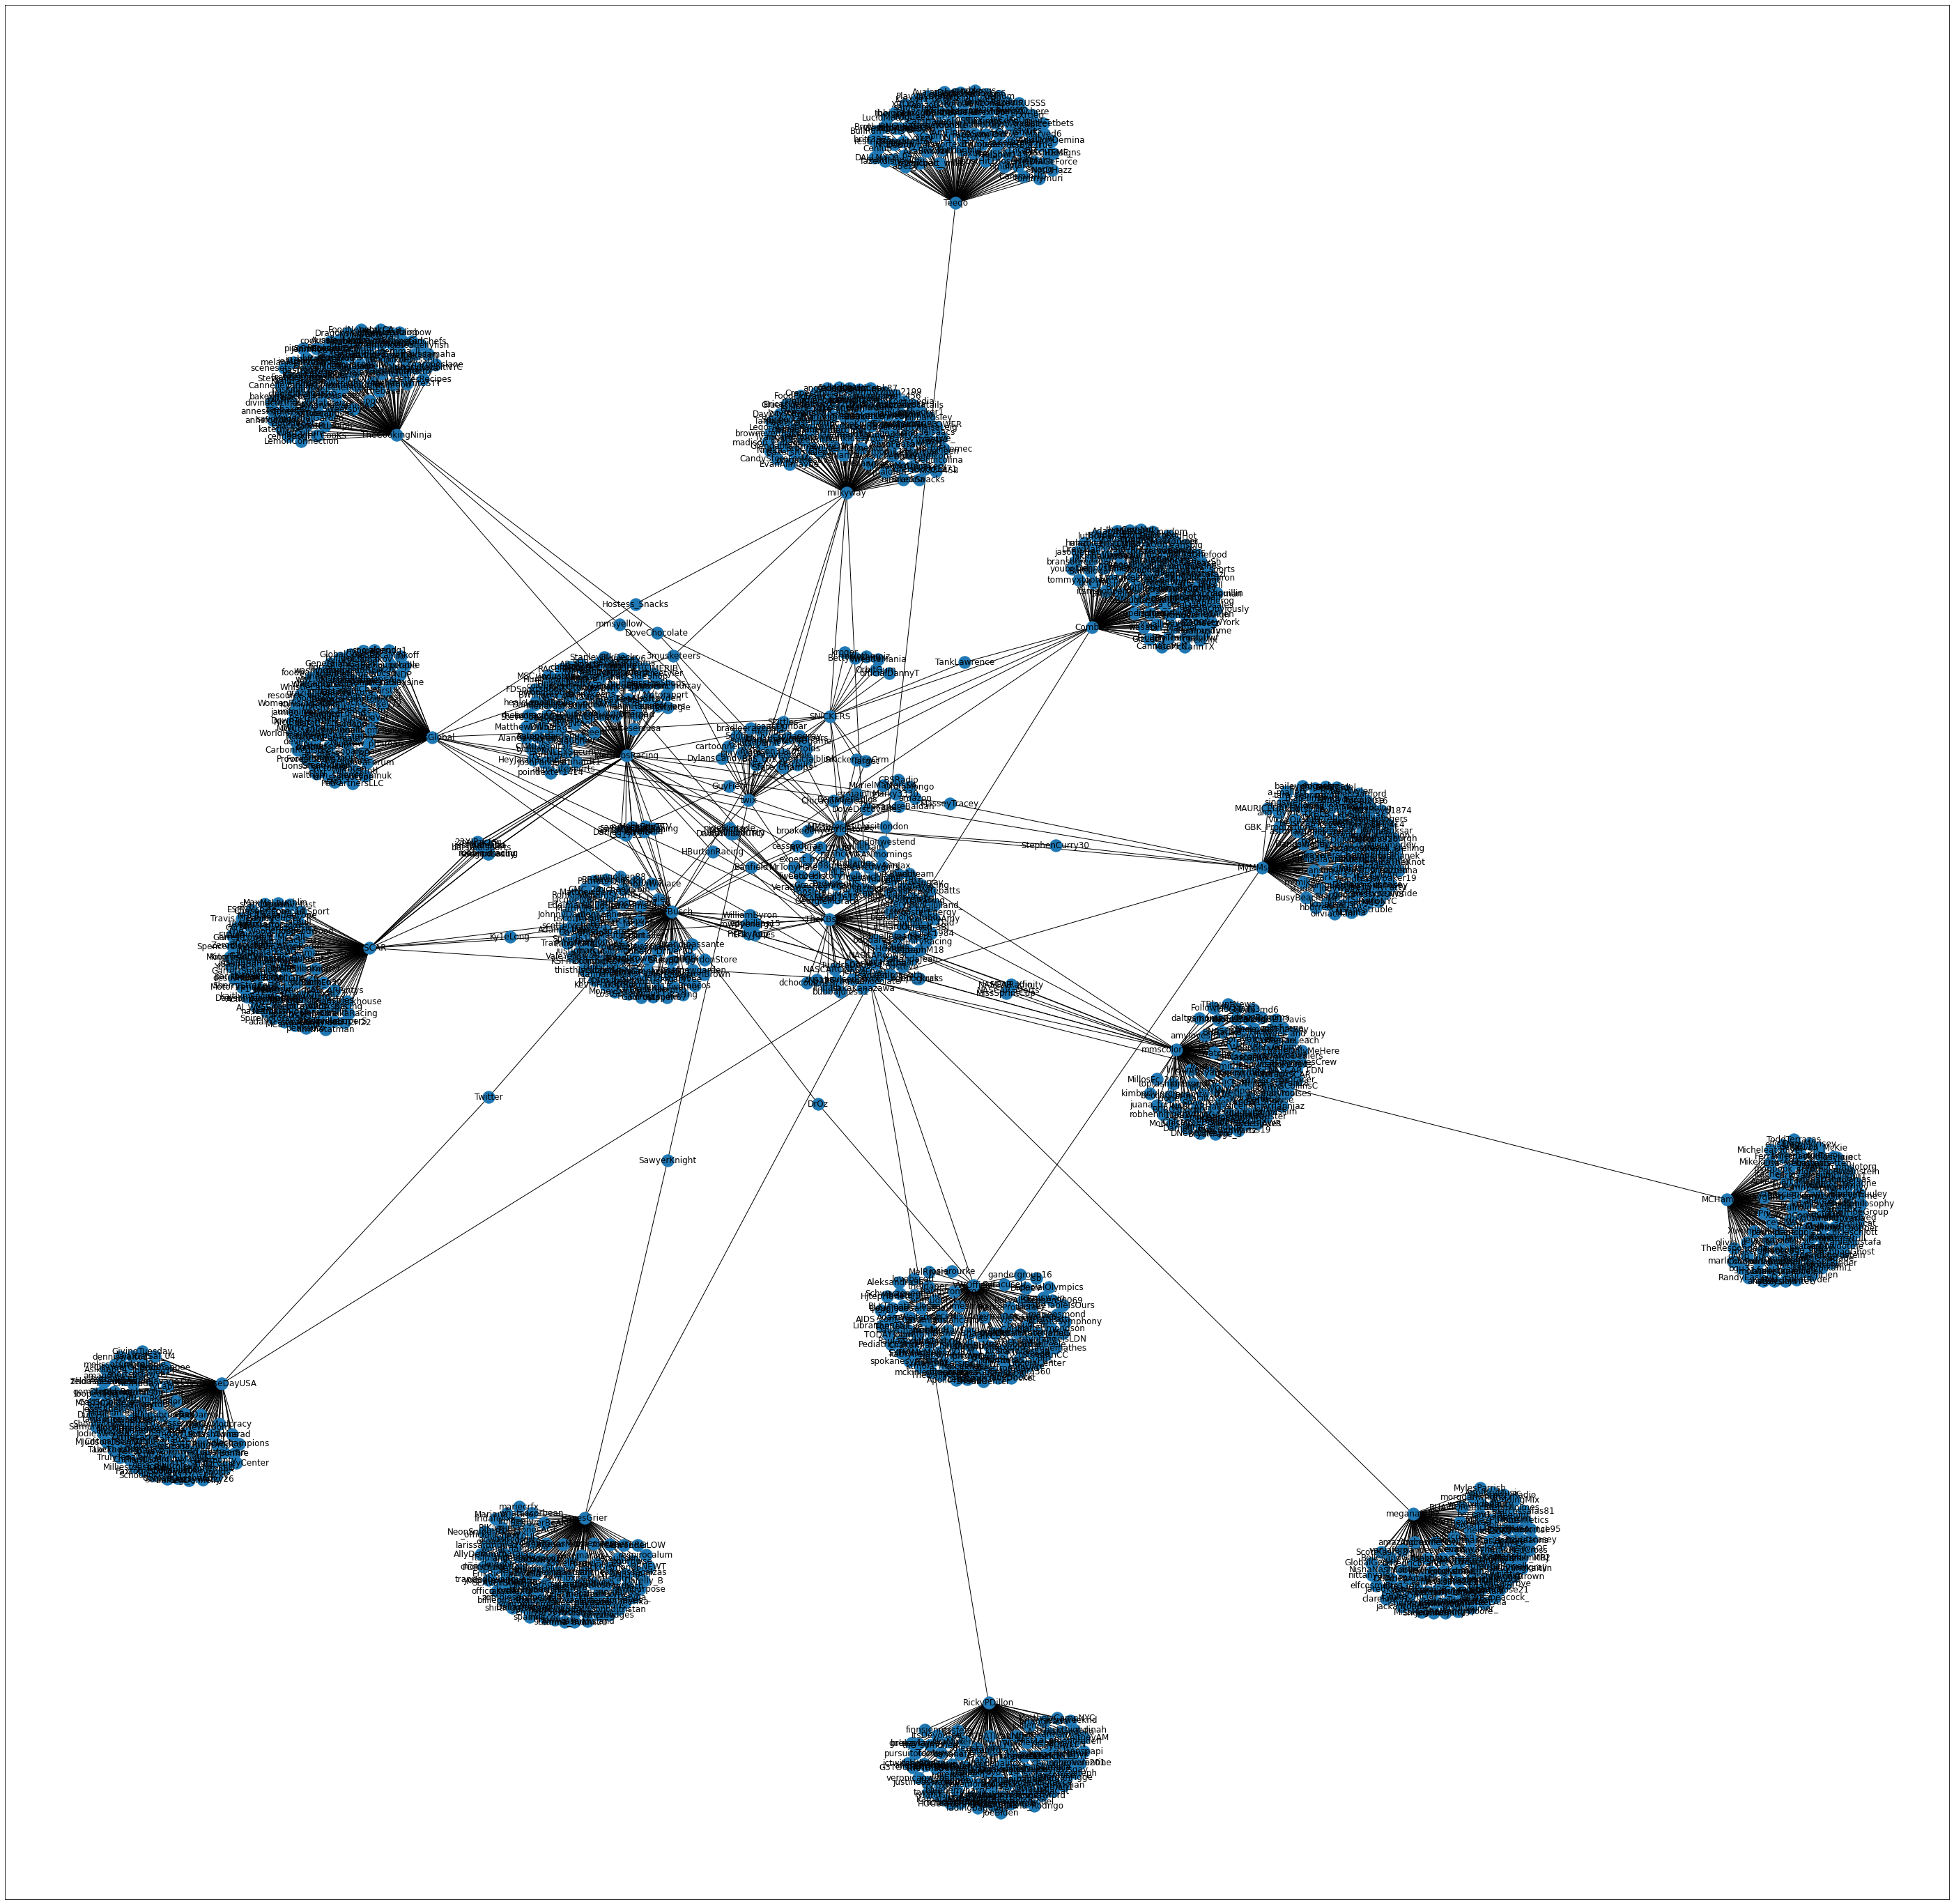

In [ ]:
#Based on Louvain heuristices
#https://perso.uclouvain.be/vincent.blondel/research/louvain.html
part = community.best_partition(G)


plt.figure(figsize=(50,50))
nx.draw_networkx(G, pos=nx.spring_layout(G)) 
plt.show()

In [ ]:
%%capture

print(part)

In [ ]:
nx.set_node_attributes(G, values = part, name = "modularity")

In [ ]:
%%capture

modularity = {} # Create a new, empty dictionary
for k,v in part.items(): # Loop through the community dictionary
    if v not in modularity:
        modularity[v] = [k] # Add a new key for a modularity class the code hasn't seen before
    else:
        modularity[v].append(k) # Append a name to the list for a modularity class the code has already seen

for k,v in modularity.items(): # Loop through the new dictionary
    #if len(v) > 2: # Filter out modularity classes with 2 or fewer nodes
        print('Class '+str(k)+':', v) # Print out the classes and their members